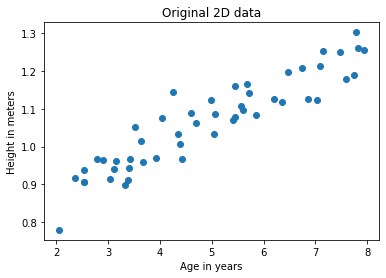

In [2]:
'''
%PCA Run principal component analysis  
%   
% initialize samples of x and y training dataset
% boy's height with age
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x = np.loadtxt('ex2x.dat')
y  = np.loadtxt('ex2y.dat')  #house cost

x = x[:,None]
y = y[:,None]

m = len(y); # store the number of training examples
plt.figure #% open a new figure window
#%plot your training set (and label the axes):
plt.plot(x, y, 'o');
plt.ylabel('Height in meters')
plt.xlabel('Age in years')
plt.title('Original 2D data');

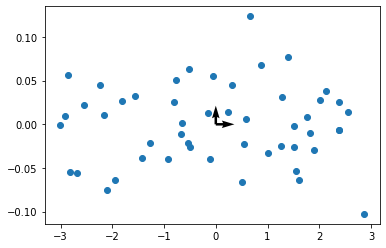

In [4]:
data=np.hstack((x,y))#[x,y]
mu = [np.mean(data[:,0]),np.mean(data[:,1])] #% each row is a data sample
mu_mat = mu + np.zeros((m,1))
data_m = (data[:] - mu_mat[:])

# ====================== YOUR CODE HERE ======================
#Compute the covariance matrix- one line of code
# Note: When computing the covariance matrix, remember to divide by m (the
# number of examples).
Sx = np.cov(data_m,rowvar=False)


# %  Then use the "svd" function to compute the eigenvectors
#%     and eigenvalues of the covariance matrix. 
[U,D,V]  = np.linalg.svd(Sx)


# ====================== YOUR CODE END ======================

largest_eigenvec = V[:,0]
largest_eigenval = D[0];
medium_eigenvec = V[:,1];
medium_eigenval = D[1];
X0=mu[0]
Y0=mu[1]
plt.quiver([X0,Y0],  largest_eigenvec[0]*np.sqrt(largest_eigenval), largest_eigenvec[1]*np.sqrt(largest_eigenval))
plt.quiver([X0, Y0],  medium_eigenvec[1]*np.sqrt(medium_eigenval), medium_eigenvec[1]*np.sqrt(medium_eigenval))
data_2d = data_m@V #Projects the data along the both eigven vector directions, One column is along the largest eigen vector, the other column is along the medium eigenvector.

#% Plot the 2D decorrelated data 
#figure;
plt.plot(data_2d[:,0], data_2d[:,1], 'o')
plt.set_cmap('Greys')
#hold on;
#% Plot the eigenvectors (which are now the axes
plt.quiver( 0,0,1*np.sqrt(largest_eigenval), 0*np.sqrt(largest_eigenval))
plt.quiver(0, 0, 0*np.sqrt(medium_eigenval), 1*np.sqrt(medium_eigenval))
#hold on;


Matrix of Covariance: 

 [[2.984218   0.19063532]
 [0.19063532 0.01419244]] 

Major Principal Component: 

 [-0.99796309 -0.06379393] 



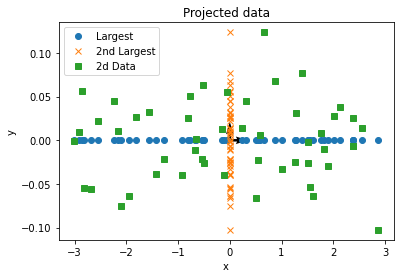

In [27]:
#%%%%%%%%%%%%% PROJECT THE DATA ONTO THE LARGEST EIGENVECTOR %%%%%%%%%%%

eigenvec_1d=largest_eigenvec

data_1d = data_m@eigenvec_1d #Projects the data along the largest eigenvector 'direction'
data_1d_1 = data_m@medium_eigenvec
#% Plot the 1D data
#figure;
#repmat(0, size(data_1d.transpose(),1), 1)
ys = np.zeros((len(data_1d),1))
plt.plot(data_1d, ys , 'o', label = "Largest")
plt.plot(ys, data_1d_1, 'x',label = "2nd Largest")
plt.plot(data_2d[:,0], data_2d[:,1], 's' ,label = '2d Data')
plt.set_cmap('Greys')

#% Plot the eigenvector
#hold on;
plt.quiver(0, 0, 1*np.sqrt(largest_eigenval), 0*np.sqrt(largest_eigenval))
plt.quiver(0,0,0, 1*np.sqrt(medium_eigenval))
#hold on;

#% Set the axis labels
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Projected data')
#grid on;

print("Matrix of Covariance: \n\n", Sx, "\n")
print("Major Principal Component: \n\n",V[:,0],"\n")
#disp("End of the program");

#### Putting it all together
Here we put everything together in one graph; the 2D data is a linear combination of component vectors as show in the plot above. Essentially, one component gives the y-coordinate for a data point, and the other component gives the x-coordinate for the data point. 